# K-Means

## O que é ?

- Algoritmo de Agrupramento (Clustering)

- Minimizar a variação dentro de cada grupo

- Maximizar a variação entre grupos diferentes

- Minimizar a Inércia (ou  Critério da Soma dos Quadrados)
    - $$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$

## Como funciona

- Escolha Inicial de Centroides

O algoritmo começa escolhendo KK pontos aleatórios do dataset como centroides iniciais dos clusters.

- Atribuição de Dados aos Clusters

Cada ponto de dados é atribuído ao cluster cujo centroide é o mais próximo, com base em alguma medida de distância (geralmente a distância euclidiana).

- Atualização dos Centroides

Após todos os pontos serem atribuídos a um cluster, os centroides são recalculados como a média de todos os pontos no cluster.

- Iteração

Os passos 2 e 3 são repetidos até que os centroides não mudem significativamente entre iterações, indicando que os clusters foram estabilizados.

## Aplicações

- Segmentação de Mercado:
    * Identificação de Grupos de Consumidores com Comportamentos Semelhantes.
    * Personalização de Estratégias de Marketing.

- Análise de Imagens:
    * Compressão de Imagens por Agrupamento de Pixels Semelhantes.
    * Segmentação de Regiões em Imagens Médicas.

- Agrupamento de Documentos:
    * Organização de Documentos em Categorias Temáticas.
    * Análise de Tópicos em Grandes Conjuntos de Textos.

- Sensoriamento Remoto:
    * Agrupamento de Dados de Satélites para Identificação de Padrões Geográficos.
    * Classificação de Terrenos e Coberturas Terrestres.
    
- Monitoramento de Rede:
    * Detecção de Anomalias em Tráfego de Rede.
    * Agrupamento de Dispositivos com Comportamentos Semelhantes.

## Vantagens

### Simplicidade e Eficiência
K-Means é fácil de implementar e entender. É eficiente em termos de tempo de execução, especialmente em grandes conjuntos de dados.

### Adaptação a Diferentes Tipos de Dados
Pode ser aplicado a uma ampla variedade de tipos de dados e é útil em muitos domínios diferentes.

### Identificação de Clusters Naturalmente Formados 
É eficaz na identificação de clusters naturais dentro dos dados.

## Desvantagens

### Escolha de KK
Determinar o número correto de clusters (KK) nem sempre é fácil e pode requerer várias execuções com diferentes valores de KK.

### Sensibilidade a Inicializações
Os resultados podem variar com diferentes inicializações de centroides, o que pode levar a uma convergência para ótimos locais.

### Sensível a Outliers
K-Means é sensível a outliers, pois eles podem distorcer a média de um cluster.

### Limitação a Formas de Cluster 
Assume que os clusters são esféricos e de tamanho similar, o que pode não ser adequado para alguns conjuntos de dados.

## Exemplos de Código

### Conjunto de Dados Dígitos Manuscritos

In [1]:
# Realiza as importações necessárias
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Inicializa e mostra o conjunto de dados
data, labels = load_digits(return_X_y=True)

(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# Dígitos : {n_digits}")
print(f"# Amostras: {n_samples}")
print(f"# Features: {n_features}")

# Dígitos : 10
# Amostras: 1797
# Features: 64


In [3]:
def bench_k_means(kmeans, name, data, labels):
    """ Realiza comparação entre diferentes métodos de
        inicialização do KMeans.

    Parâmetros
    ----------
    kmeans : KMeans instance
        Uma instância :class:`~sklearn.cluster.KMeans` com a inicialização
        já definida.
    name : str
        Nome dado à estratégia. Será usado para mostrar os resultados na tabela.
    data : ndarray of shape (n_samples, n_features)
        Dados para agrupar.
    labels : ndarray of shape (n_samples,)
        Os rótulos usados para computar as métricas de agrupamento que
        requerem alguma supervisão.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define as métricas que requerem apenas rótulos verdadeiros e do estimador
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # O silhouette score precisa de todo o conjunto de dados
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Mostra os resultados
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [4]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.041s	69545	0.598	0.645	0.621	0.469	0.617	0.155
random   	0.019s	69735	0.681	0.723	0.701	0.574	0.698	0.148
PCA-based	0.006s	72686	0.636	0.658	0.647	0.521	0.643	0.156
__________________________________________________________________________________


- ### Inércia
    - Em termos simples, representa o quão compactos os clusters são. Valores menores de inércia são melhores, indicando clusters mais compactos.
    
- ### Homogeneidade
    - Mede se todos os clusters contêm apenas pontos de dados que são membros de uma única classe. Uma pontuação de homogeneidade de 1.0 é a melhor.
   
- ### Completude
    - Mede se todos os pontos de dados que são membros de uma determinada classe são elementos do mesmo cluster. Uma pontuação de completude de 1.0 é a melhor.

- ### V-Measure
    - É a média harmônica entre homogeneidade e completude. Essa métrica é útil, pois fornece um único número que representa tanto a homogeneidade quanto a completude. Valores mais altos indicam melhor desempenho.

- ### Índice de Rand Ajustado (ARI - Adjusted Rand Index)
    - Compara os agrupamentos obtidos com os rótulos verdadeiros, considerando todas as combinações de pares de amostras e contando quantas vezes são atribuídas ao mesmo ou a diferentes clusters em ambos os agrupamentos. O valor varia de -1 a 1, onde 1 significa uma correspondência perfeita entre os agrupamentos.

- ### Índice de Mutual Information Ajustado (AMI - Adjusted Mutual Information)
    - Mede a concordância entre os agrupamentos e os rótulos verdadeiros, considerando todas as combinações de pares de amostras e medindo a informação mútua. O valor varia de 0 a 1, onde 1 significa uma correspondência perfeita entre os agrupamentos.

- ### Silhouette Score
    - Avalia a coesão intra-cluster e a separação inter-cluster. Quanto mais próximo de 1, melhor é a estrutura dos clusters. Valores negativos indicam que os pontos podem ter sido atribuídos ao cluster errado.

In [5]:
# Reduz a dimensionalidade dos dados com PCA
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Define os valores para plotar o grid.
# Define a granularidade da malha.
h = 0.02

# Define os limites da malha.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Seta rótulos para cada ponto na malha.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

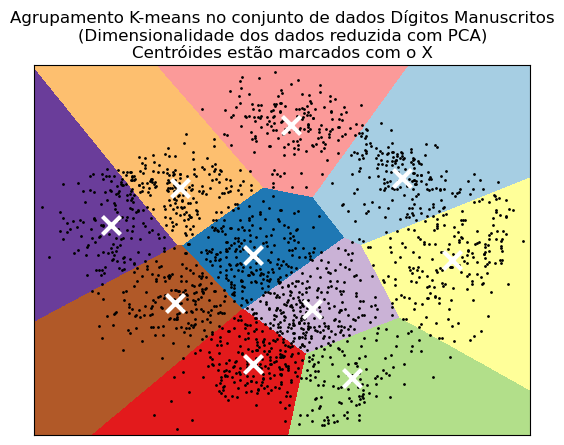

In [6]:
# Plota os diagramas de Voronoi
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plota os centróides com um X branco
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "Agrupamento K-means no conjunto de dados Dígitos Manuscritos\n"
    "(Dimensionalidade dos dados reduzida com PCA)\n"
    "Centróides estão marcados com o X"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()